In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\\Users\\Sadneya\\Downloads\\new\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8751 files belonging to 38 classes.


In [39]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\\Users\\Sadneya\\Downloads\\new\\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10547 files belonging to 38 classes.


In [40]:
cnn = tf.keras.models.Sequential()

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [42]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [46]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [47]:
cnn.add(tf.keras.layers.Flatten())

In [48]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [49]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [50]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [51]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.6899 - loss: 1.0451 - val_accuracy: 0.7446 - val_loss: 0.8403
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 655s 2s/step - accuracy: 0.7568 - loss: 0.7759 - val_accuracy: 0.7524 - val_loss: 0.8613
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.8082 - loss: 0.6085 - val_accuracy: 0.8032 - val_loss: 0.6795
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.8489 - loss: 0.4682 - val_accuracy: 0.8293 - val_loss: 0.5642
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.8807 - loss: 0.3722 - val_accuracy: 0.7998 - val_loss: 0.7131
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 466s 2s/step - accuracy: 0.8862 - loss: 0.3547 - val_accuracy: 0.8501 - val_loss: 0.5377
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.9244 - loss: 0.2512 - val_accuracy: 0.8363 - val_loss: 0.5877
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9284 - loss: 0.2156 - val_accu

In [55]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

274/274 ━━━━━━━━━━━━━━━━━━━━ 61s 222ms/step - accuracy: 0.9775 - loss: 0.0719
Training accuracy: 0.9817163944244385


In [56]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

330/330 ━━━━━━━━━━━━━━━━━━━━ 76s 229ms/step - accuracy: 0.8622 - loss: 0.4956
Validation accuracy: 0.8619512915611267


In [57]:
cnn.save('trained_plant_disease_model.keras')

In [58]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7114615440368652,
  0.7730544805526733,
  0.8237915635108948,
  0.8562449812889099,
  0.886070191860199,
  0.9025254249572754,
  0.9236658811569214,
  0.9344074726104736,
  0.9427493810653687,
  0.9460632801055908],
 'loss': [0.968792200088501,
  0.7402527928352356,
  0.5577307939529419,
  0.44846513867378235,
  0.35789233446121216,
  0.2976880967617035,
  0.24552138149738312,
  0.19903434813022614,
  0.17300456762313843,
  0.16100871562957764],
 'val_accuracy': [0.7445719242095947,
  0.7524414658546448,
  0.8031668066978455,
  0.8293353319168091,
  0.7998483180999756,
  0.8500995635986328,
  0.836256742477417,
  0.8709585666656494,
  0.8768370151519775,
  0.8619512915611267],
 'val_loss': [0.8402616381645203,
  0.8613191246986389,
  0.6794760823249817,
  0.5641669034957886,
  0.7130919098854065,
  0.5376817584037781,
  0.5877420902252197,
  0.46715104579925537,
  0.4640393555164337,
  0.48931434750556946]}

In [59]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [60]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


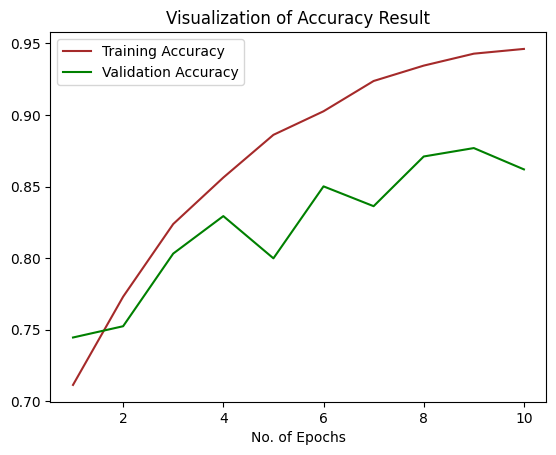

In [61]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [62]:
class_name = validation_set.class_names

In [64]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\\Users\\Sadneya\\Downloads\\new\\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10547 files belonging to 38 classes.


In [65]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

10547/10547 ━━━━━━━━━━━━━━━━━━━━ 310s 29ms/step


In [66]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [67]:
Y_true

<tf.Tensor: shape=(10547,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
predicted_categories

<tf.Tensor: shape=(10547,), dtype=int64, numpy=array([ 0,  0,  8, ..., 37, 35, 37], dtype=int64)>

In [69]:
!pip install scikit-learn


DEPRECATION: Loading egg at c:\users\sadneya\appdata\local\programs\python\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [71]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       110
           1       0.87      0.81      0.84        85
          10       0.94      0.98      0.96       221
          11       0.94      0.74      0.82       220
          12       0.83      0.96      0.89       232
          13       0.89      0.91      0.90       220
          14       0.74      0.92      0.82        79
          15       0.92      0.99      0.96      1166
          16       0.93      0.82      0.87       440
          17       0.45      1.00      0.62        21
          18       0.64      0.59      0.61       129
          19       0.91      0.83      0.87       303
           2       0.71      0.60      0.65        60
          20       0.92      0.89      0.91       224
          21       0.83      0.49      0.61       204
          22       0.36      0.25      0.30        16
          23       0.98      0.66      0.78       180
          24       0.91    

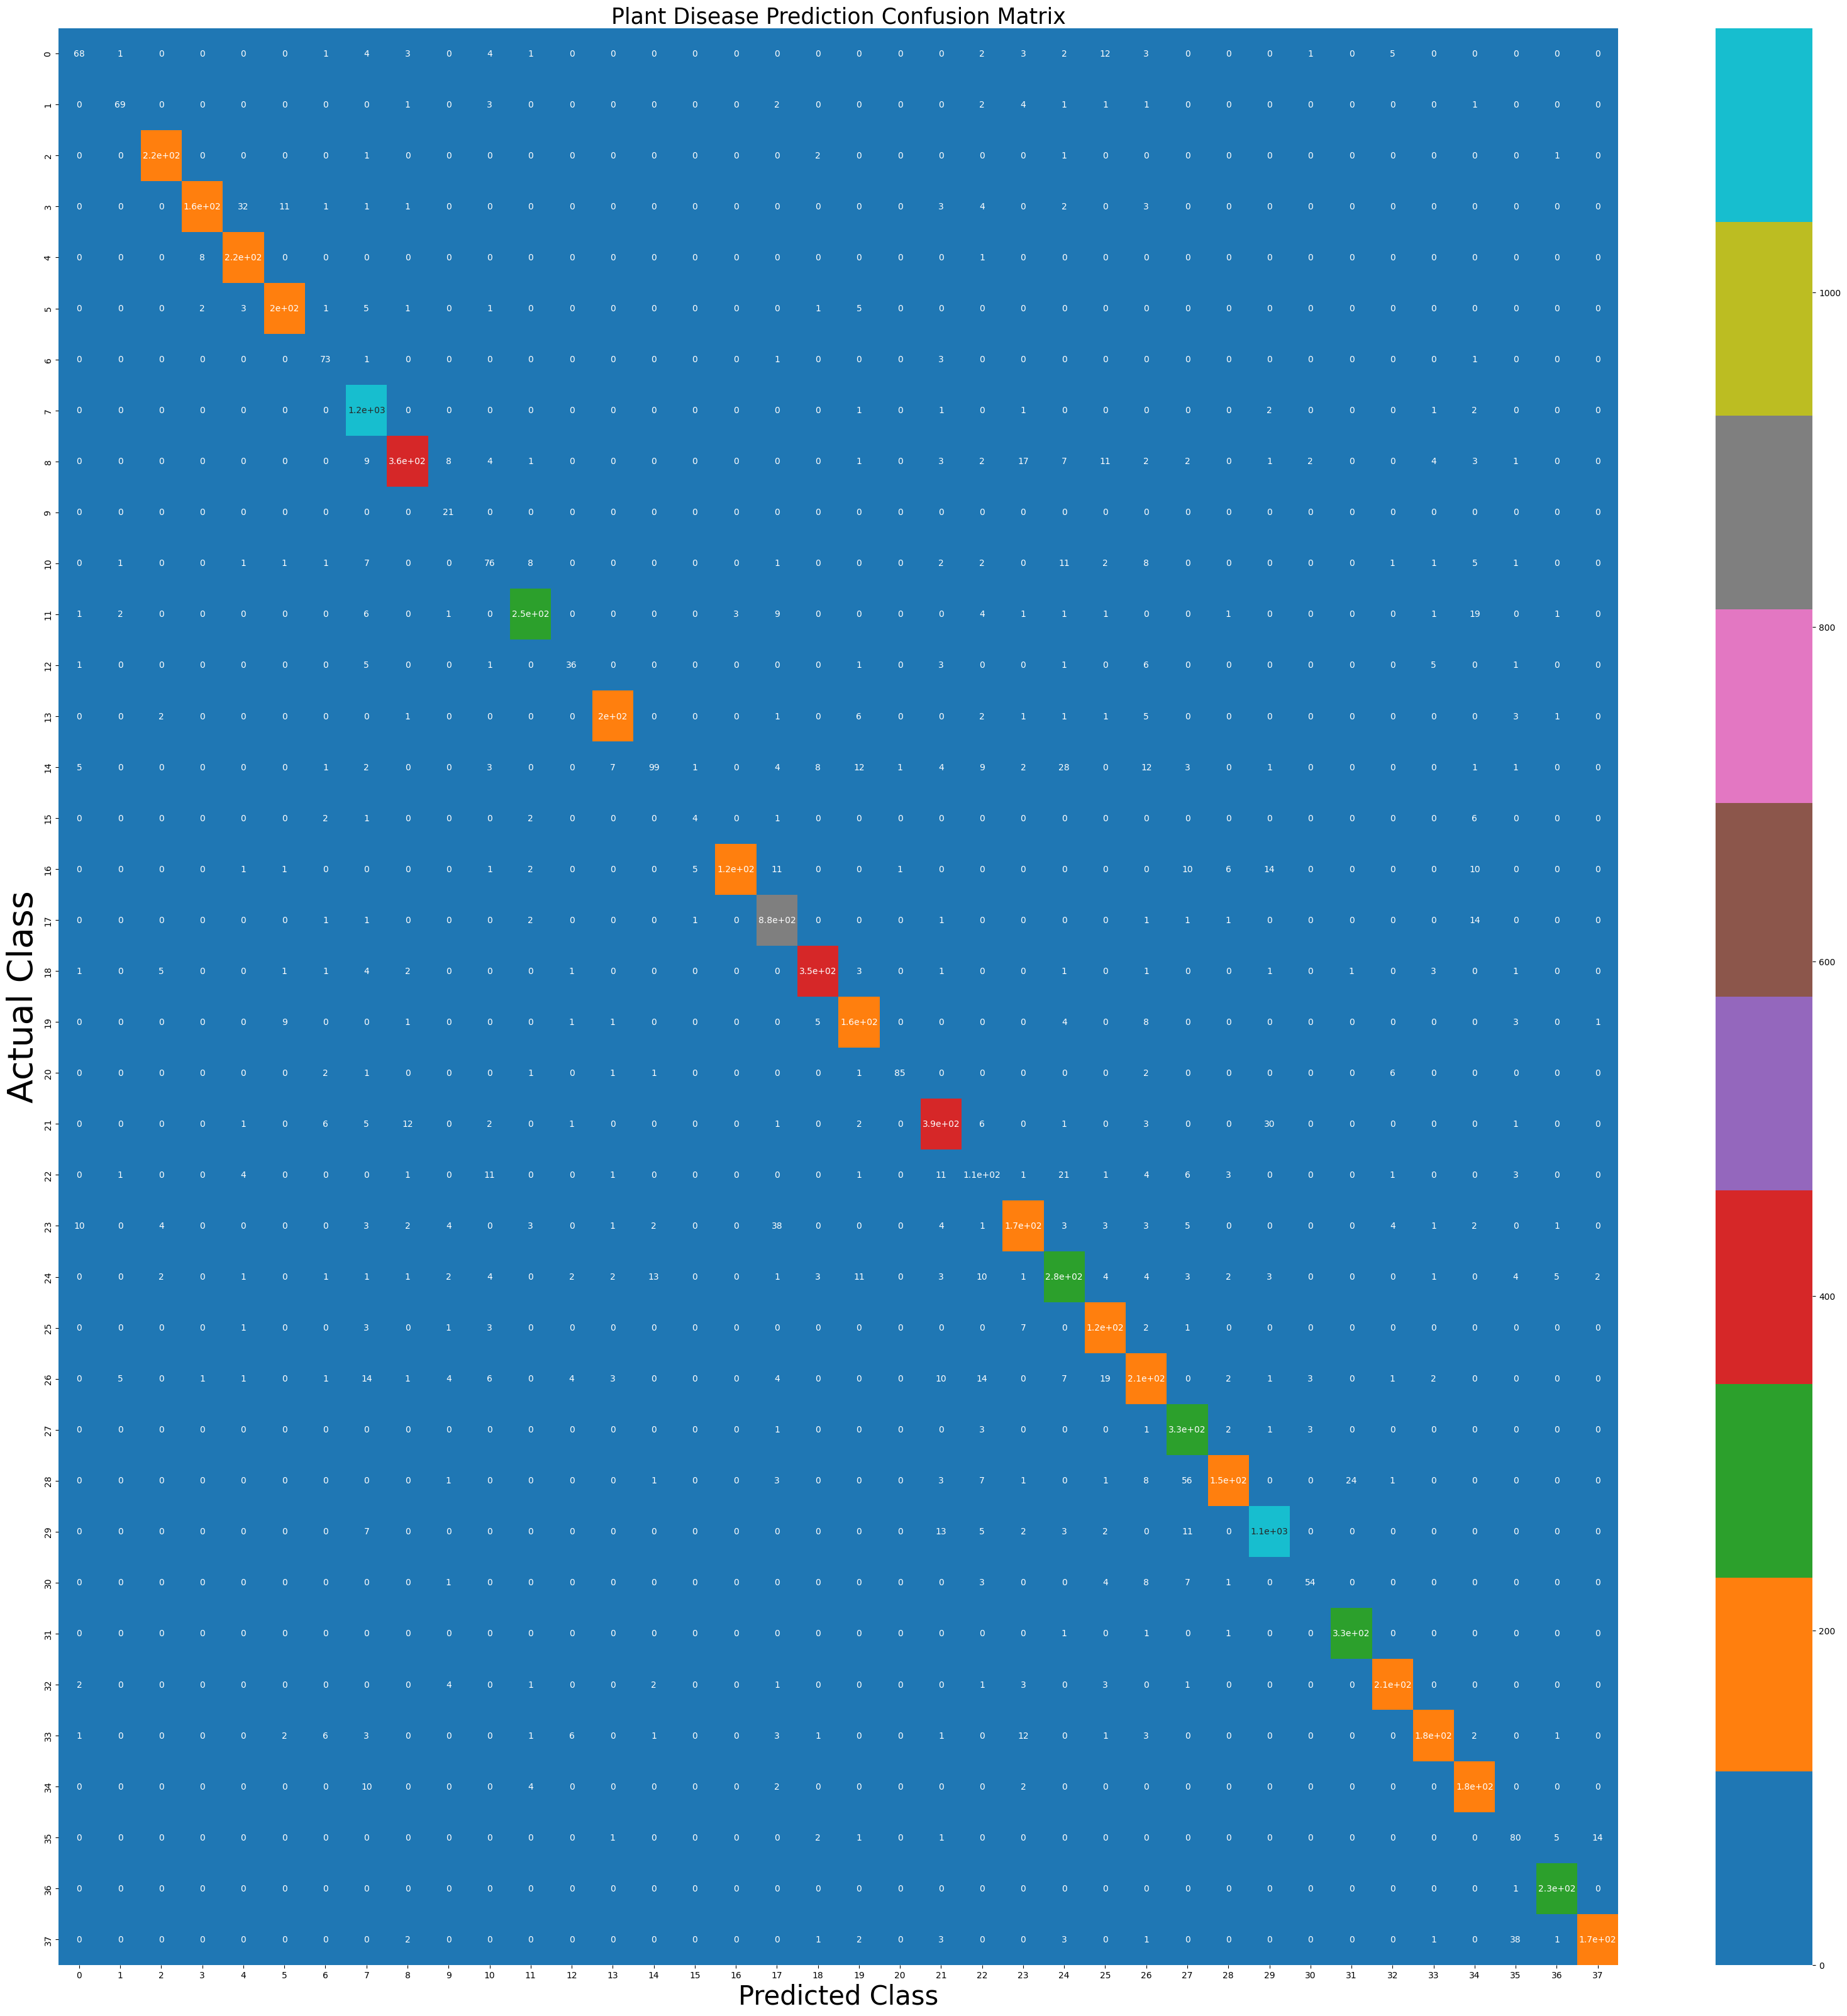

In [72]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10}, cmap='tab10')

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()